# Exploring Data Interactively

Widgets (still part of the IPython project) let you interactively explore a graph or dataset.

Create a few simple, interactive plots using the Seaborn visualization library and IPython widgets. These examples use the newly-released [College Scorecard Data](https://collegescorecard.ed.gov/data/ "College Scorecard Data").

Notes:
* This is not any kind of rigorous analysis of the College Scorecard data!!
* To enable the plots' interactivity, [run a local copy of the notebook](../INSTALL.md "Installation instructions"). The version rendered on GitHub isn't interactive.

## Housekeeping
* set file names
* import libraries for plotting and widgets

In [23]:
#files
EARNINGS_FILE = 'https://s3.amazonaws.com/ed-college-choice-public/Most+Recent+Cohorts+(Treasury+Elements).csv'
SCORECARD_FILE = 'https://s3.amazonaws.com/ed-college-choice-public/Most+Recent+Cohorts+(Scorecard+Elements).csv'
DATA_DICTIONARY_FILE = 'https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary-09-08-2015.csv'

#plotting and widget libraries
%matplotlib inline
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import seaborn as sns

## Get Scorecard
This is a pretty wide .csv, so we'll only grab the fields used in this notebook:

In [12]:
#converter functions
def ownership(x):
    if x == '1':
        return 'public'
    elif x == '2':
        return 'private non-profit'
    elif x == '3':
        return 'private for-profit'
    else:
        return 'unknown'
#list of fields we'll use
scorecard_fields = {
    'UNITID' : 'id', 
    'INSTNM' : 'InstitutionName',
    'CITY' : 'City',
    'STABBR' : 'State',
    'PREDDEG' : 'PredominantDegreeAwarded', #1=certificate, 2=associates, 3=bachelors, 4=all graduate
    'CONTROL': 'Ownership', #1=public, 2=private non-profit, 3=private for-profit
    'GRAD_DEBT_MDN_SUPP' : 'CompleteMedianDebtSuppressed',
    'md_earn_wne_p10' : 'MedianEarningsWorking10Years'
}
scorecard = pd.read_csv(
    SCORECARD_FILE,
    usecols = scorecard_fields.keys(),
    na_values = ['PrivacySuppressed'],
    converters = {'CONTROL' : ownership}
)
#rename columns
scorecard = scorecard.rename(columns = scorecard_fields)

## Peek at Data

In [24]:
#peek at data
scorecard.head(3).T

,0,1,3
id,100654,100663,100706
InstitutionName,Alabama A & M University,University of Alabama at Birmingham,University of Alabama in Huntsville
City,Normal,Birmingham,Huntsville
State,AL,AL,AL
PredominantDegreeAwarded,3,3,3
Ownership,public,public,public
CompleteMedianDebtSuppressed,33611.5,23117,24738
MedianEarningsWorking10Years,31400,40300,46600
Percent250007Years,0.5304475,0.6933692,0.7186147
Percent250009Years,0.5878378,0.7372685,0.7811935


## Get Earnings

Pull in some supplemental earnings data, again pulling a small subset of fields into the pandas dataframe.

In [14]:
earnings_fields = {
    'UNITID' : 'id', 
    'gt_25k_p10' : 'Percent2500010Years',
    'gt_25k_p9' : 'Percent250009Years',
    'gt_25k_p8' : 'Percent250008Years',
    'gt_25k_p7' : 'Percent250007Years',
    'gt_25k_p6' : 'Percent250006Years'
    
}
earnings = pd.read_csv(
    EARNINGS_FILE,
    usecols = earnings_fields.keys(),
    na_values = ['PrivacySuppressed']
)
#rename columns
earnings = earnings.rename(columns = earnings_fields)
#peek at data
earnings.head(3).T

,0,1,2
id,100654.000000,100663.000000,100690.000000
Percent250007Years,0.530448,0.693369,0.662791
Percent250009Years,0.587838,0.737269,0.735632
Percent2500010Years,0.622063,0.749342,0.717647
Percent250006Years,0.462298,0.660484,0.646667
Percent250008Years,0.535882,0.713874,0.676471


## Merge

Use UNITID (id) to merge the supplemental earnings into the scorecard dataset. This will give us a single dataframe to play with. Then do a little cleanup:
* Drop rows with incomplete data or with data that was suppressed for privacy due to a small sample size
* Fix up data type
* Convert percentages

In [15]:
scorecard = pd.merge(scorecard, earnings)
scorecard = scorecard.dropna()
scorecard.id = scorecard.id.astype(np.object)
scorecard['Percent2500010Years'] = scorecard['Percent2500010Years']*100

## Peek at Merged Data

In [25]:
scorecard.head(3).T

,0,1,3
id,100654,100663,100706
InstitutionName,Alabama A & M University,University of Alabama at Birmingham,University of Alabama in Huntsville
City,Normal,Birmingham,Huntsville
State,AL,AL,AL
PredominantDegreeAwarded,3,3,3
Ownership,public,public,public
CompleteMedianDebtSuppressed,33611.5,23117,24738
MedianEarningsWorking10Years,31400,40300,46600
Percent250007Years,0.5304475,0.6933692,0.7186147
Percent250009Years,0.5878378,0.7372685,0.7811935


## Simple Widget - Distribution

In [ ]:
dist_radio = widgets.RadioButtons(
    description='Variable:',
    options=[
        'Percent2500010Years',
        'MedianEarningsWorking10Years',
        'CompleteMedianDebtSuppressed']
)
def render_distplot(var):
    ax = sns.distplot(scorecard[var])
dist = interactive(render_distplot, var = dist_radio)

None

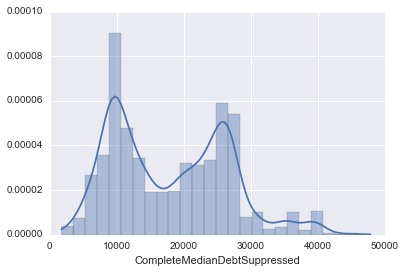

In [17]:
display(dist)

## Simple Widget - Boxplot Toggle

None

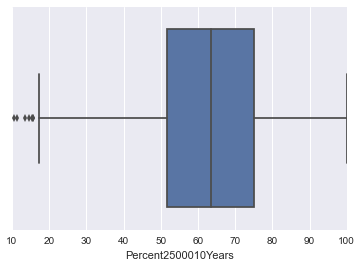

In [18]:
var_toggle = widgets.ToggleButtons(
    description='Variable:',
    options=[
        'Percent2500010Years',
        'MedianEarningsWorking10Years',
        'CompleteMedianDebtSuppressed']
)
def render_boxplot(var):
    ax = sns.boxplot(x=scorecard[var])
v = interactive(render_boxplot, var = var_toggle)
display(v)

## Slider Widget

**TODO**: Show % of schools on the y-axis instead of a straight count

In [ ]:
slider = widgets.FloatSlider(
    value = 50, 
    min = int(scorecard.Percent2500010Years.min()),
    max = int(scorecard.Percent2500010Years.max()),
    step = 5,
    description = "% earning $25,000/yr or more 10 years after entry")
def plot_by_ownership(percent_25000 = 50):
    countplot = sns.countplot(
        x = 'Ownership',
        data=scorecard[scorecard['Percent2500010Years'] >= percent_25000]
    )
    countplot.set(ylabel = 'Total')
    countplot.set(ylim=(1,2200))
    #this title does not show up
    countplot.set_title = 'Total Number of Schools Where Percent Working Students Make at Least $25,000/yr is >= {}'.format(percent_25000)
s = interactive(plot_by_ownership, percent_25000 = slider)

None

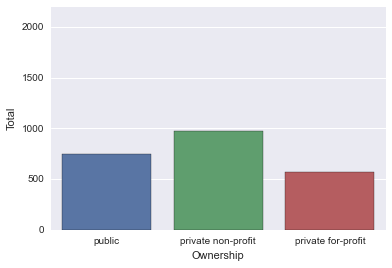

In [19]:
display(s)